##Q1. Titanic
1. Find the correlation between 'survived' (target column) and 'sex' column for the Titanic use case in class.
  Do you think we should keep this feature?

  Answer: Yes, females have a significantly higher survival rate as shown below so I'd assume it's pretty important


Get access to google drive

In [84]:
# from google.colab import drive
# drive.mount('/content/drive')

Import necessary libraries

In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import datasets, combine into list

In [86]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combine=[train_df,test_df]

Print the count of people that survived/died

In [87]:
#0 = Died
#1 = Survived
print(train_df['Survived'].value_counts(dropna='False'))

0    549
1    342
Name: Survived, dtype: int64


print all the null values count of each column [lets us know which columns to drop/fill in missing values for]

In [88]:
#Shows where all the null values are and how many are in each column
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Show the average survival rate of each class level

In [89]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#1 =Upper class
#2 =Middle
#3 =Lower

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Show the correlation of sex and survival

In [90]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

#More females survived than males
#Yes, we should keep this feature because our endgoal is to predict how many people survive

,Sex,Survived
0,female,0.742038
1,male,0.188908


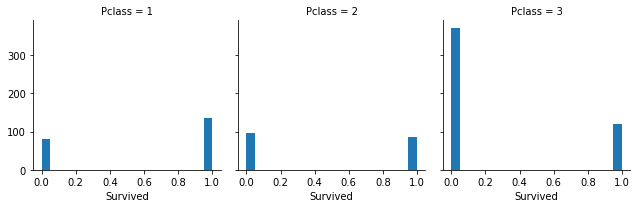

In [91]:
g=sns.FacetGrid(train_df,col='Pclass')
g.map(plt.hist,'Survived',bins=20)

#More lower class died than both upper and middle class combined

Convert categorical column to numeric

In [92]:
#Convert sex to gender
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [93]:
#Replace NaN values of the Age column with the median age using Sex and Pclass
for dataset in combine:
  med = dataset.groupby(['Sex', 'Pclass']).median()['Age']
  dataset.Age = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

train_df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
80,63.00,1.0
69,53.00,1.0
1,0.67,1.0
...,...,...
50,36.50,0.0
55,40.50,0.0
31,23.50,0.0
26,20.50,0.0


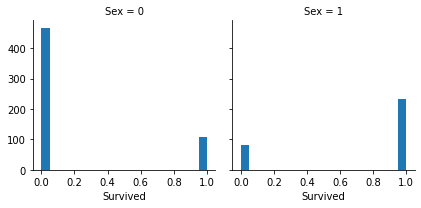

In [94]:
g=sns.FacetGrid(train_df,col='Sex')
g.map(plt.hist,'Survived',bins=20)
#There was more males(sex=0) that died than females(sex=1)

In [95]:
#Fill missing values with most common occurence
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#Port of embarkation: Where they're from; C=Cherbourg, Q=Queenstown, S=Southampton

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Cherbourg had the highest survivability rate

In [96]:
#Convert categorical Embarked to numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [97]:
train_df.Embarked.value_counts()
#It is notable that despite Cherbourg had the second most people, it had a higher survival rate

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [98]:
#Fill the missing values of Fare with the most common
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)

train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [99]:
#Export cleaned df's
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [100]:
#Reading the data
train_df=pd.read_csv('./train_preprocessed.csv')
test_df=pd.read_csv('./test_preprocessed.csv')

X_train=train_df.drop(['Survived','Name','Ticket','Cabin'],axis=1)
Y_train=train_df['Survived']

X_test=test_df.drop(["PassengerId", 'Cabin','Name','Ticket'],axis=1).copy()
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


Split data into train/test

In [101]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train)

print(len(x_train))
print(len(x_test))

668
223


In [102]:
from sklearn.svm import SVC

#Use SVM algorithm
svc=SVC()
svc.fit(x_train,y_train)

Y_pred=svc.predict(x_test)
acc_svc=round(svc.score(x_train,y_train)*100,2)
print("svm accuracy is:", acc_svc)


svm accuracy is: 65.72


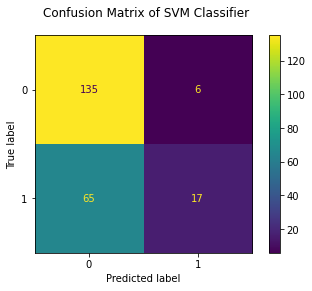

In [103]:
from sklearn import metrics
#Get the svm confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
disp.figure_.suptitle("Confusion Matrix of SVM Classifier")
plt.show()

On average, looking at the confusion matrix for SVM classifier, we're getting a lot of false negatives.

Meaning more people are seemingly dying than they really are

In [104]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes algorithm
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

77.99

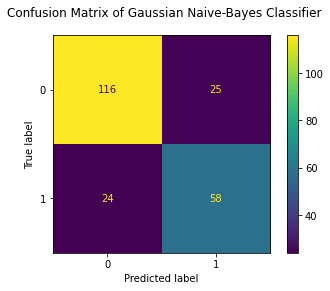

In [105]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
#Get the guassian confusion matrix
disp.figure_.suptitle("Confusion Matrix of Gaussian Naive-Bayes Classifier")
plt.show()

In [106]:
import sklearn
#Use Multinomial Naive Bayes algorithm
cl_multi = sklearn.naive_bayes.MultinomialNB()
res_multi = cl_multi.fit(x_train, y_train).predict(x_test)
round(metrics.accuracy_score(y_test, res_multi) * 100,2)

60.09

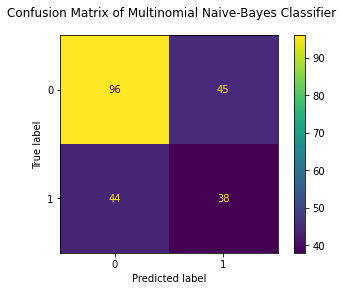

In [107]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, res_multi)
#Get the Multinomial confusion matrix
disp.figure_.suptitle("Confusion Matrix of Multinomial Naive-Bayes Classifier")
plt.show()

In [108]:
cl_bern = sklearn.naive_bayes.BernoulliNB()
#Use the Bernoullis Naive Bayes algorithm
res_bern = cl_bern.fit(x_train, y_train).predict(x_test)
round(metrics.accuracy_score(y_test, res_bern) * 100,2)

80.72

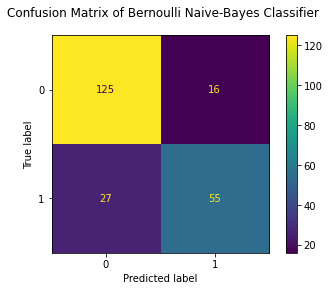

In [109]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, res_bern)
#Get the Bernoulli confusion matrix
disp.figure_.suptitle("Confusion Matrix of Bernoulli Naive-Bayes Classifier")
plt.show()

False positives and false negatives are more even with bernoulli

In [110]:
from sklearn.neighbors import KNeighborsClassifier
#Use KNN algorithm
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

79.79

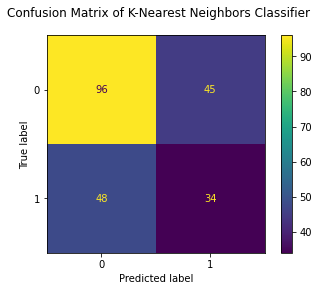

In [111]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
#Get KNN confusion matrix
disp.figure_.suptitle("Confusion Matrix of K-Nearest Neighbors Classifier")
plt.show()

KNN also gives a more even amount of false negatives and false positives.

On average, KNN gives us a higher accuracy

##Q2. Optical Recognition of Handwritten Digits Data Set
1. Implement [SVM, Naïve Bayes, KNN] methods using scikit-learn library

Import dependencies

In [112]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Load the dataset, this dataset is built into sci-kit learn

In [113]:
digits = datasets.load_digits()

Explore the digits object. This object has several attributes with their own sub-attributes

In [114]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Print the description of the dataset

In [115]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The data attribute is just a flattened version of the images attribute. The target attribute is the label for each image.

In [116]:
print('Shape of the data attribute:', digits.data.shape)
print('Shape of the images attribute:', digits.images.shape)
print('Shape of the target attribute:', digits.target.shape)

Shape of the data attribute: (1797, 64)
Shape of the images attribute: (1797, 8, 8)
Shape of the target attribute: (1797,)


Let's visualize the first element of the data set. By plotting it we can see that the image is grainy and has a low resolution. We can also use the target attribute to see the label of the image

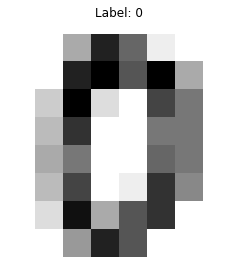

In [117]:
plt.matshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.title('Label: '+ str(digits.target[0]))
plt.show()

Let's visualize some more images, we can use matplotlib subplots to do this

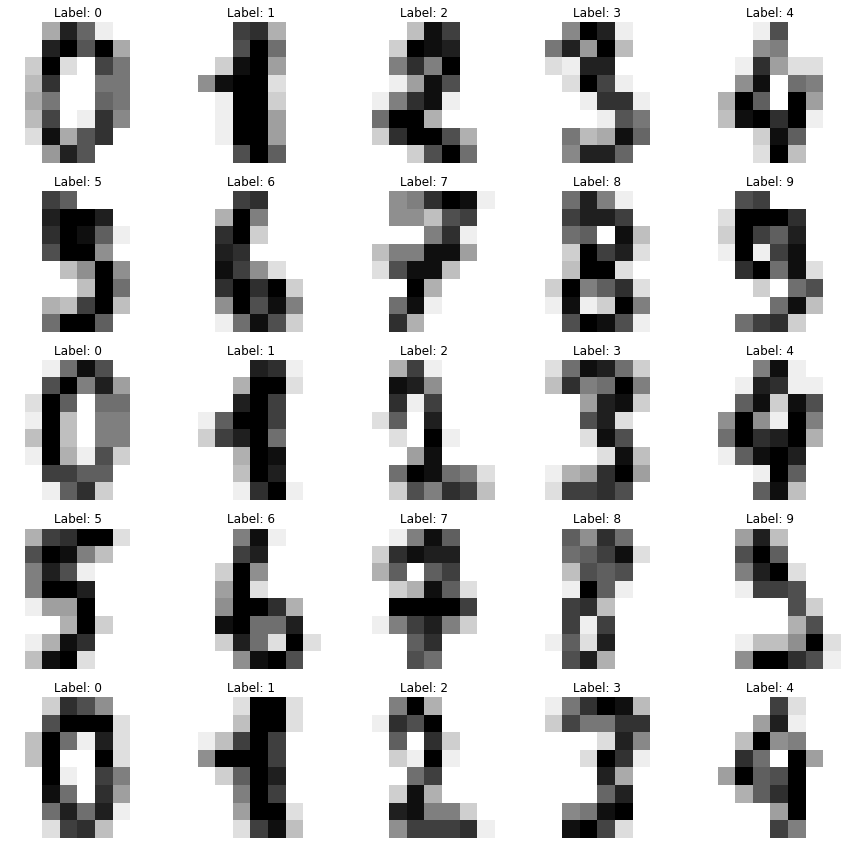

In [118]:
fig = plt.figure(figsize=(15,15))
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.imshow(digits.images[j] , cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: '+ str(digits.target[j]))
    plt.axis('off')
plt.show()

We can explore the target attribute by getting a bin count. We can see that each label is roughly equal, which is good for machine learning. If the labels were unbalanced, we might accidentally introduce bias to the model

In [119]:
count_list = np.bincount(digits.target)
for i in range(len(count_list)):
  print('The number of images with value', i, ': ', count_list[i])

The number of images with value 0 :  178
The number of images with value 1 :  182
The number of images with value 2 :  177
The number of images with value 3 :  183
The number of images with value 4 :  181
The number of images with value 5 :  182
The number of images with value 6 :  181
The number of images with value 7 :  179
The number of images with value 8 :  174
The number of images with value 9 :  180


Split the data into training and testing data. Here we use a 70/30 split.

In [120]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=.7)

Let's create a Support Vector Classifier. We have used 'standard' parameters for C and gamma. The C parameter controls error and the gamma parameter controls the curvature in the decision boundary. 

We fit the model using fit() and get predictions using predict(). We can then print the accuracy by comparing the preditions to the test labels.

In [121]:
SVM = svm.SVC(gamma=0.001, C=100.)
SVM.fit(x_train, y_train)
y_pred_svm = SVM.predict(x_test)


print('Accuracy: ', accuracy_score(y_test, y_pred_svm))

Accuracy:  0.9907407407407407


The Classifiation report gives important statistics and metrics for this classifier. The confusion matrix shows the values of TP, TN, FP, and FN. This graph is helpful to show where our error occurs


Classification report for Support Vector Machine Classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        57
           3       0.98      0.98      0.98        51
           4       1.00      1.00      1.00        54
           5       0.96      0.98      0.97        52
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        45
           8       1.00      1.00      1.00        50
           9       1.00      0.94      0.97        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540




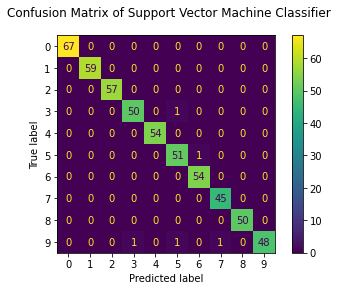

In [122]:
print("\nClassification report for Support Vector Machine Classifier %s:\n%s\n" % (SVM, metrics.classification_report(y_test, y_pred_svm)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
disp.figure_.suptitle("Confusion Matrix of Support Vector Machine Classifier")
plt.show()

The KNN classifier is very similar to the SVM. In robust applications we can use a grid search to find the best number of neighbors but here we are just using a loop

In [123]:
for i in range(1,15):
  KNN_name = 'KNN Classifier (n_neighbors='+str(i)+')'
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(x_train, y_train)
  y_pred_knn = KNN.predict(x_test)

  print('Accuracy of', KNN_name,':', accuracy_score(y_test, y_pred_knn))

#We saw the best results with 5 neighbors
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)

Accuracy of KNN Classifier (n_neighbors=1) : 0.9907407407407407
Accuracy of KNN Classifier (n_neighbors=2) : 0.9851851851851852
Accuracy of KNN Classifier (n_neighbors=3) : 0.9888888888888889
Accuracy of KNN Classifier (n_neighbors=4) : 0.9888888888888889
Accuracy of KNN Classifier (n_neighbors=5) : 0.9888888888888889
Accuracy of KNN Classifier (n_neighbors=6) : 0.9907407407407407
Accuracy of KNN Classifier (n_neighbors=7) : 0.987037037037037
Accuracy of KNN Classifier (n_neighbors=8) : 0.9851851851851852
Accuracy of KNN Classifier (n_neighbors=9) : 0.987037037037037
Accuracy of KNN Classifier (n_neighbors=10) : 0.9851851851851852
Accuracy of KNN Classifier (n_neighbors=11) : 0.9851851851851852
Accuracy of KNN Classifier (n_neighbors=12) : 0.9851851851851852
Accuracy of KNN Classifier (n_neighbors=13) : 0.9851851851851852
Accuracy of KNN Classifier (n_neighbors=14) : 0.9833333333333333


Again we use the same code to get the classification report and confusion matrix


Classification report for K-Nearest Neighbors Classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.98      1.00      0.99        59
           2       1.00      1.00      1.00        57
           3       0.96      1.00      0.98        51
           4       0.98      1.00      0.99        54
           5       0.98      0.98      0.98        52
           6       0.98      1.00      0.99        54
           7       1.00      1.00      1.00        45
           8       1.00      0.96      0.98        50
           9       1.00      0.94      0.97        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540




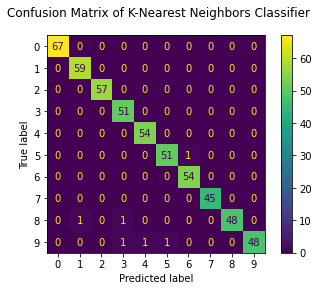

In [125]:
print("\nClassification report for K-Nearest Neighbors Classifier %s:\n%s\n" % (SVM, metrics.classification_report(y_test, y_pred_knn)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
disp.figure_.suptitle("Confusion Matrix of K-Nearest Neighbors Classifier")
plt.show()

The Naive-Bayes classifier uses the same format as the other 2 classifiers. The accuracy is much lower than the other 2

In [126]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_gnb = GNB.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_gnb))

Accuracy:  0.8407407407407408


Again we use the same code to get the classification report and confusion matrix


Classification report for Gaussian Naive-Bayes Classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       0.76      0.86      0.81        59
           2       0.94      0.60      0.73        57
           3       0.91      0.76      0.83        51
           4       0.97      0.72      0.83        54
           5       0.89      0.92      0.91        52
           6       0.96      0.98      0.97        54
           7       0.69      0.98      0.81        45
           8       0.58      0.84      0.68        50
           9       0.93      0.73      0.81        51

    accuracy                           0.84       540
   macro avg       0.86      0.84      0.84       540
weighted avg       0.87      0.84      0.84       540




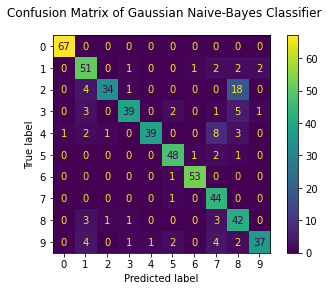

In [127]:
print("\nClassification report for Gaussian Naive-Bayes Classifier %s:\n%s\n" % (SVM, metrics.classification_report(y_test, y_pred_gnb)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb)
disp.figure_.suptitle("Confusion Matrix of Gaussian Naive-Bayes Classifier")
plt.show()

Support Vector Machine predicted this image to be the number [4]
K-Nearest Neighbors predicted this image to be the number [4]
Gaussian Naive-Bayes predicted this image to be the number [4]


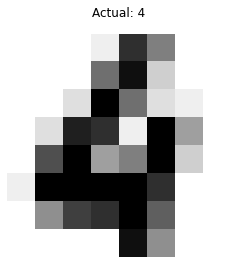

In [142]:
test_array = np.reshape(x_test[50], (1,64))

print('Support Vector Machine predicted this image to be the number', SVM.predict(test_array))
print('K-Nearest Neighbors predicted this image to be the number', KNN.predict(test_array))
print('Gaussian Naive-Bayes predicted this image to be the number', GNB.predict(test_array))

test_image = np.reshape(x_test[50], (8,8))

plt.matshow(test_image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.title('Actual: '+ str(y_test[50]))
plt.show()


In [129]:
digits.images[50].shape

(8, 8)

##Q3. (Optical Recognition of Handwritten Digits Data Set)
1. Download the dataset from the new source.
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits 

We need to make sure we are using the right files. By reading the readme.md, we can determine that optdigits.tra is the training set and optdigits.tes is the testing set

In [130]:
from google.colab import files
training = files.upload() #upload optdigits.tra

Saving optdigits.tra to optdigits (1).tra


In [131]:
testing = files.upload()  #upload optdigits.tes

Saving optdigits.tes to optdigits (1).tes


Lets extract the data. We can do this with the open() method. Each line gets added to a list. This creates a list of lists where each list is 65 elements long and includes the data (64) and label (1)

In [132]:
train_list=[]
with open('optdigits.tra', 'r') as train_data:
  for line in train_data:
    stripped_line = line.strip()
    this_line = stripped_line.split(',')
    train_list.append(this_line)
    
test_list=[]
with open('optdigits.tes', 'r') as test_data:
  for line in test_data:
    stripped_line = line.strip()
    this_line = stripped_line.split(',')
    test_list.append(this_line)

Before we do any operations on the data, lets convert the lists to a numpy array and cast all the elements as ints

In [133]:
train_w_label = np.array(train_list).astype(int)

test_w_label = np.array(test_list).astype(int)

We can splice the array to get objects that contain the data and label seperately. 

In [134]:
Y_train = train_w_label[:,-1]
X_train = train_w_label[:,:-1]

Y_test = test_w_label[:,-1]
X_test = test_w_label[:,:-1]

We want the labels to be a single dimensional vector and we want the data to be a multidimensional vector with 64 elements in each piece of data.

In [135]:
print('Training Label Shape:', Y_train.shape)
print('Training Data Shape: ', X_train.shape)

print('Testing Label Shape:', Y_test.shape)
print('Testing Data Shape: ', X_test.shape)

Training Label Shape: (3823,)
Training Data Shape:  (3823, 64)
Testing Label Shape: (1797,)
Testing Data Shape:  (1797, 64)


Now we can copy code from above and apply it to the new set

In [136]:
SVM_UCI = svm.SVC(gamma=0.001, C=100.)
SVM_UCI.fit(X_train, Y_train)
Y_pred_svm_uci = SVM_UCI.predict(X_test)

print('Accuracy: ', accuracy_score(Y_test, Y_pred_svm_uci))

Accuracy:  0.9827490261547023


Again we use the same code to get the classification report and confusion matrix


Classification report for Support Vector Machine Classifier (UCI) SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.96      0.99      0.98       182
           2       1.00      0.98      0.99       177
           3       0.98      0.98      0.98       183
           4       1.00      1.00      1.00       181
           5       0.98      0.99      0.98       182
           6       1.00      0.99      1.00       181
           7       0.99      0.96      0.97       179
           8       0.98      0.95      0.97       174
           9       0.94      0.98      0.96       180

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797




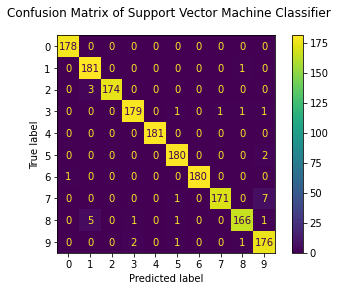

In [137]:
print("\nClassification report for Support Vector Machine Classifier (UCI) %s:\n%s\n" % (SVM_UCI, metrics.classification_report(Y_test, Y_pred_svm_uci)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_svm_uci)
disp.figure_.suptitle("Confusion Matrix of Support Vector Machine Classifier")
plt.show()

In [138]:
for i in range(1,15):
  KNN_name_uci = 'UCI KNN Classifier (n_neighbors='+str(i)+')'
  KNN_uci = KNeighborsClassifier(n_neighbors=i)
  KNN_uci.fit(X_train, Y_train)
  Y_pred_knn_uci = KNN.predict(X_test)

  print('Accuracy of', KNN_name_uci,':', accuracy_score(Y_test, Y_pred_knn_uci))

#We saw the best results with 5 neighbors
KNN_uci = KNeighborsClassifier(n_neighbors=5)
KNN_uci.fit(X_train, Y_train)
y_pred_knn_uci = KNN.predict(X_test)

Accuracy of UCI KNN Classifier (n_neighbors=1) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=2) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=3) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=4) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=5) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=6) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=7) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=8) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=9) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=10) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=11) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=12) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=13) : 0.9905397885364496
Accuracy of UCI KNN Classifier (n_neighbors=14) : 0.9905397885364496



Classification report for K-Nearest Neighbors (UCI) KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.98      1.00      0.99       182
           2       1.00      1.00      1.00       177
           3       0.98      0.99      0.99       183
           4       0.99      0.99      0.99       181
           5       0.99      0.99      0.99       182
           6       0.99      0.99      0.99       181
           7       0.99      1.00      0.99       179
           8       0.99      0.97      0.98       174
           9       0.99      0.96      0.98       180

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797




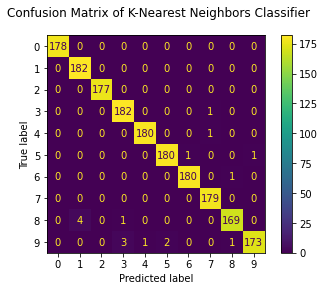

In [139]:
print("\nClassification report for K-Nearest Neighbors (UCI) %s:\n%s\n" % (KNN_uci, metrics.classification_report(Y_test, Y_pred_knn_uci)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_knn_uci)
disp.figure_.suptitle("Confusion Matrix of K-Nearest Neighbors Classifier")
plt.show()

In [140]:
GNB_UCI = GaussianNB()
GNB_UCI.fit(x_train, y_train)
Y_pred_gnb_uci = GNB_UCI.predict(X_test)

print('Accuracy: ', accuracy_score(Y_test, Y_pred_gnb_uci))

Accuracy:  0.8458542014468559



Classification report for Gaussian Naive-Bayes (UCI) GaussianNB():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.72      0.91      0.80       182
           2       0.95      0.59      0.73       177
           3       0.94      0.74      0.83       183
           4       0.98      0.84      0.90       181
           5       0.94      0.92      0.93       182
           6       0.98      0.98      0.98       181
           7       0.75      0.99      0.85       179
           8       0.55      0.83      0.66       174
           9       0.96      0.67      0.79       180

    accuracy                           0.85      1797
   macro avg       0.88      0.85      0.85      1797
weighted avg       0.88      0.85      0.85      1797




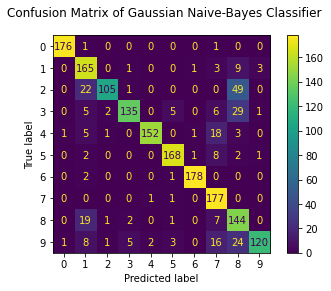

In [141]:
print("\nClassification report for Gaussian Naive-Bayes (UCI) %s:\n%s\n" % (GNB_UCI, metrics.classification_report(Y_test, Y_pred_gnb_uci)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_gnb_uci)
disp.figure_.suptitle("Confusion Matrix of Gaussian Naive-Bayes Classifier")
plt.show()